In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [3]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [4]:
df

,feature1,feature2,target
0,-2.151406,1.330213,-76.051997
1,0.444279,0.523083,80.702442
2,-0.380530,-0.044711,-41.601319
3,0.514993,0.956022,154.853826
4,-0.543258,-1.409227,-77.762774
...,...,...,...
95,0.392501,-0.044023,-48.104402
96,0.065810,0.041706,1.114578
97,0.585348,-1.228683,17.261013
98,0.416092,0.545697,122.541781


In [5]:
df.head()

,feature1,feature2,target
0,-2.151406,1.330213,-76.051997
1,0.444279,0.523083,80.702442
2,-0.380530,-0.044711,-41.601319
3,0.514993,0.956022,154.853826
4,-0.543258,-1.409227,-77.762774


In [6]:
df.sample(5)

,feature1,feature2,target
3,0.514993,0.956022,154.853826
44,0.674147,0.615054,9.718817
9,0.346853,-0.287448,10.856994
22,1.064668,0.125684,41.528002
89,1.797952,0.336918,142.718904


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [8]:
df.describe()

,feature1,feature2,target
count,100.000000,100.000000,100.000000
mean,-0.152559,0.237397,-7.063421
std,0.993737,0.969422,109.994479
min,-2.293775,-2.376655,-274.821686
25%,-0.806951,-0.329227,-81.225177
50%,-0.167391,0.307202,-2.390815
75%,0.523822,0.759611,85.196864
max,1.881643,2.496982,213.036887


In [9]:
df.shape

(100, 3)

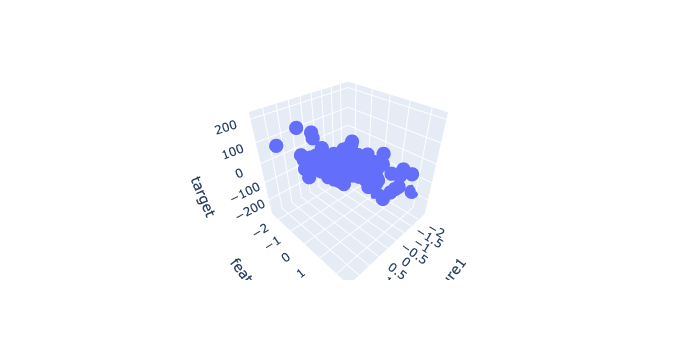

In [15]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred=lr.predict(X_test)

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 scaore",r2_score(y_test,y_pred))

MAE 41.13421905534655
MSE 2883.005492816989
R2 scaore 0.777133800317565


In [26]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)
z = z_final

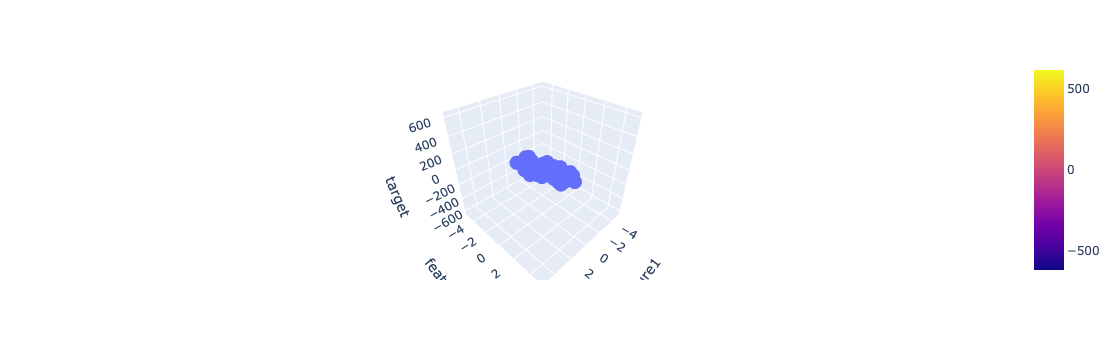

In [33]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.add_trace(go.Surface(x = x, y = y, z =z ))
fig.show()

In [28]:
lr.coef_

array([91.51224098, 31.46680084])

In [29]:
lr.intercept_

-0.5256112213498731